In [0]:
# Imports

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import glob

import os

from PIL import Image

In [0]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Defining the paths for reading data


path="/content/gdrive/My Drive/signature-data/train/020"
path1="/content/gdrive/My Drive/signature-data/train/020/02_020.png"
path2="/content/gdrive/My Drive/signature-data/train/020/03_020.png"
path3="/content/gdrive/My Drive/signature-data/train/050"

 ************************************
  ************************************
   ************************************
  <font color='aquamarine'>
 Making of picture that contains all the signatures from one author, showing the variability of such signatures
</font> 

 ************************************
  ************************************
   ************************************

In [0]:
# 1) read all the original images from one author; here - an author with id 020, or 50

In [0]:
def load_images_from_folder(folder):
  images = []
  labels = []
  for filename in os.listdir(folder):
    img = Image.open(os.path.join(folder,filename))
    images.append(img)
    labels.append(filename)
  return images, labels



path_for_variablility = "/content/gdrive/My Drive/signature-data/train/020"


images_variability, labels=load_images_from_folder(path_for_variablility)

In [0]:
first_image = images_variability[0]
first_image_size = np.array(first_image).shape
first_image_size

(411, 899, 3)

In [0]:
# 2) resize all the images to the resolution of first one in dataset

In [0]:
for image in images_variability:
  image=image.resize((first_image_size[1],first_image_size[0]),Image.ANTIALIAS)
  # ANTIALIAS -> gives the best possible quality possible after resizing

In [0]:
# 3) making pictures transparent

In [0]:
def make_transparent(image):
  
  image = image.convert("RGBA")
  datas = image.getdata()

  newData = []
  for item in datas:
      if item[0] == 255 and item[1] == 255 and item[2] == 255:
          newData.append((255, 255, 255, 0))
      else:
          if item[0] > 200:
              newData.append((0, 0, 0, 0))
          else:
              newData.append(item)

        
  image.putdata(newData)
  return image


In [0]:
image = Image.open(path2)
image = image.convert("RGBA")
#im = make_transparent(im)
#np.array(image).shape
datas = image.getdata()
np.array(datas).shape
np.array(datas)

# https://pillow.readthedocs.io/en/5.1.x/reference/Image.html

array([[245, 253, 253, 255],
       [245, 253, 253, 255],
       [245, 253, 253, 255],
       ...,
       [245, 253, 253, 255],
       [245, 253, 253, 255],
       [245, 253, 253, 255]])

In [0]:
# 4) adding pictures one on top of another

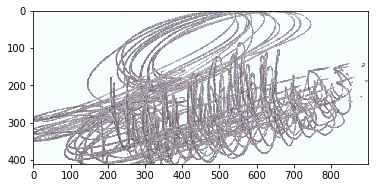

In [0]:
im_tmp=first_image.copy()

for i in range(1,len(images_variability)):
  im=images_variability[i]
  im = make_transparent(im)
  im_tmp.paste(im, (0, 0), im)
  # paste doesn't have return value, works in-place
  

  
plt.imshow(im_tmp)